### insurance amount prediction

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


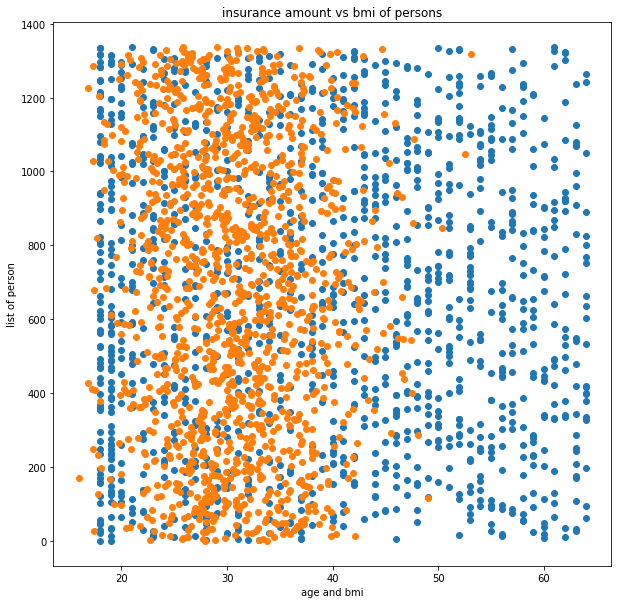

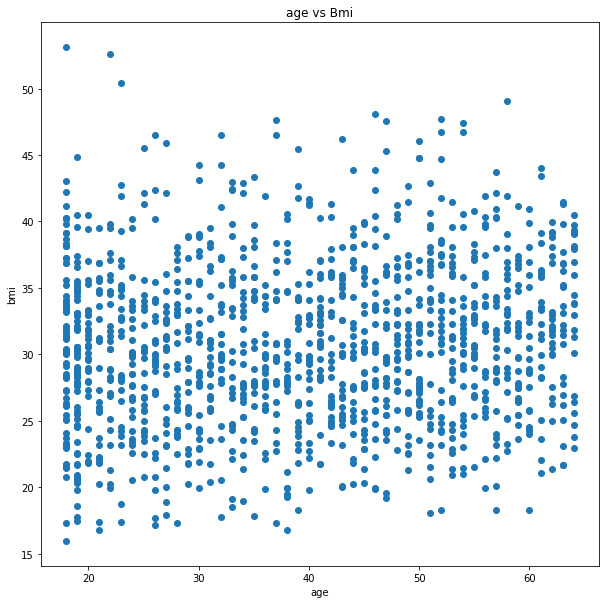

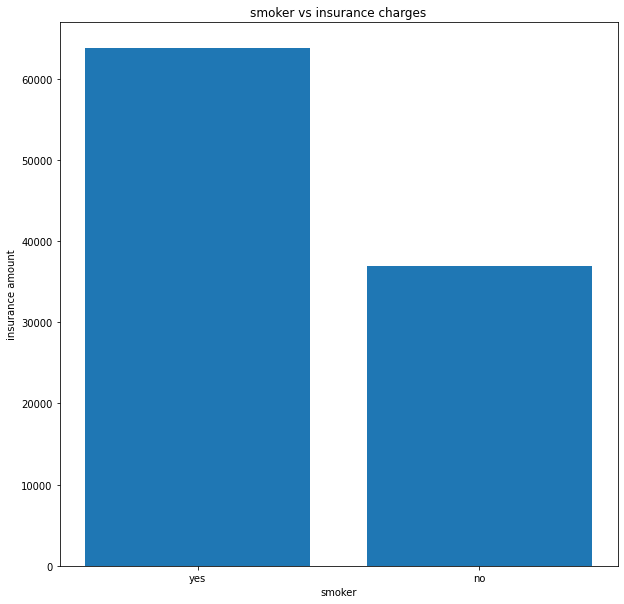

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv("insurance.csv")
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(insurance["age"], np.arange(0,1338))
ax.scatter(insurance["bmi"], np.arange(0,1338))
ax.set(title='insurance amount vs bmi of persons', xlabel='age and bmi', ylabel='list of person')

fig1,ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(insurance["age"],insurance["bmi"])
ax1.set(title='age vs Bmi', xlabel='age', ylabel='bmi')

fig_smoke,ax_smoke = plt.subplots(figsize=(10,10))
ax_smoke.bar(insurance["smoker"],insurance["charges"])
ax_smoke.set(title='smoker vs insurance charges', xlabel='smoker', ylabel='insurance amount');

### converting string to numberic data

the accuaracy of model is 87.89997623004689


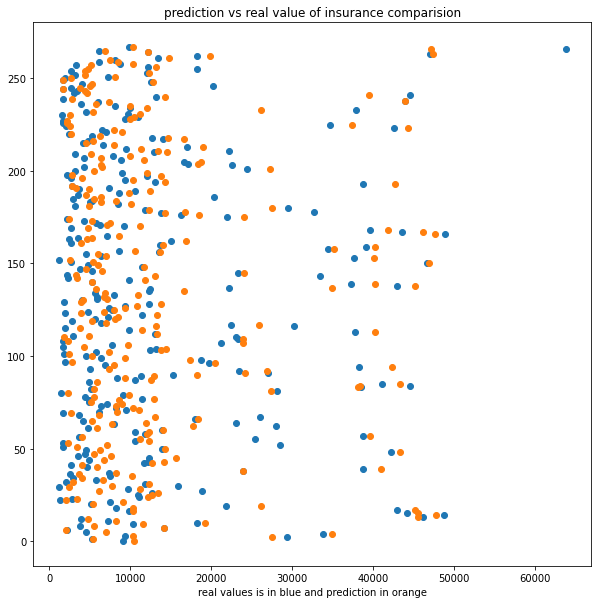

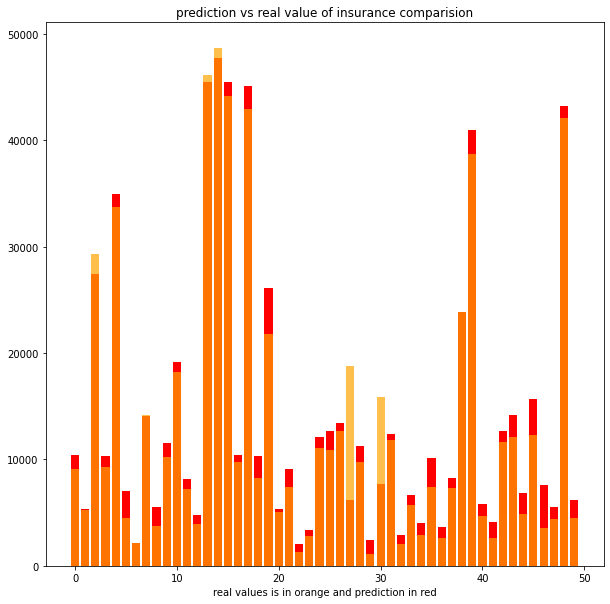

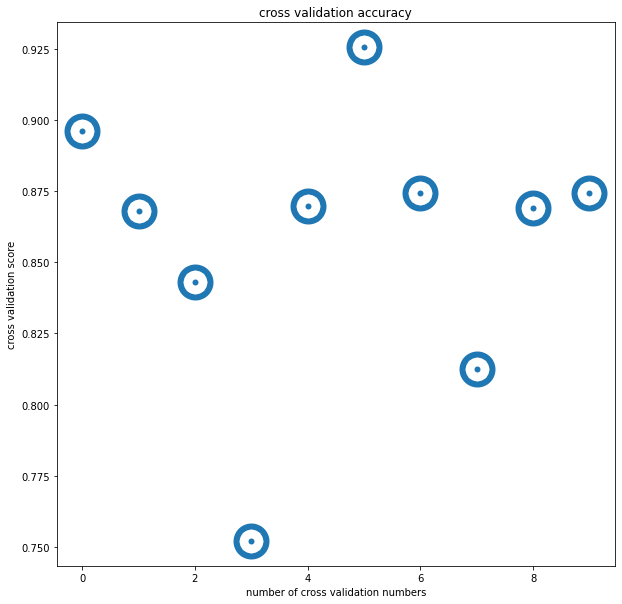

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
# splitung data in labels and features
labels = insurance.drop("charges", axis=1)
features = insurance["charges"]
np.random.seed(42)
# spliting data into train and test samples
x_train,x_test,y_train,y_test = train_test_split(labels, features, test_size = 0.2)


#converting strings to numbers
oneHot = OneHotEncoder()
catagorical_features = ["sex", "smoker", "region"]

transformer = ColumnTransformer([('oneHot', oneHot, catagorical_features)], remainder='passthrough')

fit_transform_x = transformer.fit_transform(x_train)
pd.DataFrame(fit_transform_x)

# initating the model
reg = RandomForestRegressor(n_estimators = 100,max_depth=10,min_samples_leaf=10, min_samples_split=10)

# fitting the model
reg.fit(fit_transform_x,y_train)

# getting score
## converting strings to numeric in test data\
oneHot1 = OneHotEncoder()
catagorical_features1 = ["sex", "smoker", "region"]

transformer_test = ColumnTransformer([('oneHot1', oneHot1, catagorical_features1)], remainder='passthrough')

fit_transform_x_test = transformer_test.fit_transform(x_test)
score = reg.score(fit_transform_x_test,y_test)
print(f"the accuaracy of model is {score*100}")
# getting prediction

y_preds = reg.predict(fit_transform_x_test)
y_test_new = pd.DataFrame(y_test)


fig2,ax2 = plt.subplots(figsize = (10,10))
ax2.scatter(y_test_new['charges'], np.arange(0,268))
ax2.scatter(y_preds, np.arange(0,268))
ax2.set(title='prediction vs real value of insurance comparision',xlabel='real values is in blue and prediction in orange')

fig3,ax3 = plt.subplots(figsize = (10,10))
ax3.bar(np.arange(0,50),y_preds[0:50], color='red', alpha=1)
ax3.bar(np.arange(0,50),y_test_new['charges'][0:50],color='orange',alpha=0.7)
ax3.set(title='prediction vs real value of insurance comparision',xlabel='real values is in orange and prediction in red')


# cross validating the model
####converting labels to numbers
oneHot2 = OneHotEncoder()
catagorical_features2 = ["sex", "smoker", "region"]

transformer_labels = ColumnTransformer([('oneHot2', oneHot2, catagorical_features2)], remainder='passthrough')

fit_transform_labels = transformer_labels.fit_transform(labels)


cross_val = cross_val_score(reg,fit_transform_labels, features, cv=10)
fig_cross,ax_cross = plt.subplots(figsize = (10,10))
ax_cross.scatter(np.arange(0,10),cross_val, linewidths=30)
ax_cross.set(title='cross validation accuracy', xlabel='number of cross validation numbers', ylabel='cross validation score');

